## 최신 기출동형 모의고사 - 제3회 기출동형 모의고사
### 1. 머신러닝 (50점)

In [1]:
import pandas as pd
import requests
from io import StringIO

url1 = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/hotel_bookings.csv'
response1 = requests.get(url1)
hotel = pd.read_csv(StringIO(response1.text))
hotel

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90
...,...,...,...,...,...,...,...,...,...,...,...
19995,1,Non Refund,89.0,2,2,0.0,0,0,0,0,62.00
19996,1,Non Refund,101.0,0,3,0.0,0,0,0,0,130.00
19997,1,Non Refund,277.0,1,2,0.0,0,0,0,0,100.00
19998,1,No Deposit,0.0,0,1,0.0,0,0,0,0,209.00


#### (1) 데이터를 탐색하고 탐색 결과를 제시하시오.

info 함수를 이용해서 자료형과 null값 탐색

탐색 결과 lead_time, is_repeated_guest, adr 열에 대해서 결측치 존재

In [2]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


범주형 변수의 값 확인

In [3]:
hotel['deposit_type'].unique(), hotel['is_canceled'].unique()

(array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object),
 array([0, 1]))

기술 통계량 확인

In [4]:
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,20000.0,0.120000,0.324970,0.00,0.0,0.0,0.0,1.0
lead_time,19995.0,85.978345,96.427240,0.00,11.0,51.0,132.0,629.0
stays_in_weekend_nights,20000.0,0.892550,0.952077,0.00,0.0,1.0,2.0,13.0
stays_in_week_nights,20000.0,2.380400,1.777345,0.00,1.0,2.0,3.0,30.0
is_repeated_guest,19642.0,0.038133,0.191521,0.00,0.0,0.0,0.0,1.0
previous_cancellations,20000.0,0.032900,0.455552,0.00,0.0,0.0,0.0,26.0
previous_bookings_not_canceled,20000.0,0.169050,1.502426,0.00,0.0,0.0,0.0,66.0
booking_changes,20000.0,0.269400,0.687566,0.00,0.0,0.0,0.0,17.0
days_in_waiting_list,20000.0,1.983950,15.927212,0.00,0.0,0.0,0.0,379.0
adr,18937.0,101.410239,49.245097,-6.38,68.8,94.5,126.0,451.5


#### (2) 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.

결측치가 존재하는 열은 `lead_time`, `is_repeated_guest`, `adr`

그 중에서 is_repeated_guest는 누락된 것으로 보이며 이는 반복적으로 방문하지 않은 고객일 가능성이 높으므로 0으로 대체

그 외는 범위가 넓은 수치형 범수이므로 결측치 제거

In [5]:
hotel[hotel['is_repeated_guest'].isna()] = hotel[hotel['is_repeated_guest'].isna()].fillna(0)
hotel = hotel.dropna()
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18951 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     18951 non-null  int64  
 1   deposit_type                    18951 non-null  object 
 2   lead_time                       18951 non-null  float64
 3   stays_in_weekend_nights         18951 non-null  int64  
 4   stays_in_week_nights            18951 non-null  int64  
 5   is_repeated_guest               18951 non-null  float64
 6   previous_cancellations          18951 non-null  int64  
 7   previous_bookings_not_canceled  18951 non-null  int64  
 8   booking_changes                 18951 non-null  int64  
 9   days_in_waiting_list            18951 non-null  int64  
 10  adr                             18951 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


#### (3) 데이터 질을 향상시킬 수 있는 방법을 제안하시오

1. deposit_type을 범주형 변수로 변환
2. adr 변수를 min_max scaling

In [6]:
convert = {value : index for index, value in enumerate(hotel['deposit_type'].unique())}

hotel['deposit_type'] = hotel['deposit_type'].apply(lambda x: convert[x])
hotel['adr'] = (hotel['adr'] - hotel['adr'].min()) / (hotel['adr'].max() - hotel['adr'].min())
hotel.head()

/opt/homebrew/Caskroom/miniforge/base/envs/adp/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/homebrew/Caskroom/miniforge/base/envs/adp/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,0,105.0,2,5,0.0,0,0,1,0,0.301127
1,0,0,303.0,2,2,0.0,0,0,0,0,0.175439
3,0,0,48.0,0,1,0.0,0,0,1,0,0.189307
4,0,0,216.0,4,7,0.0,0,0,2,0,0.146938
5,0,0,116.0,2,4,0.0,0,0,0,0,0.206997


#### (4) 데이터 불균형을 시각화하여 식별하고 불균형 판단근거를 작성하시오.

0인 데이터의 비율이 87퍼센트이므로 데이터 불균형이 심한 편이다.

0 비율 87.99007967917261
1 비율 12.009920320827398


<AxesSubplot:>

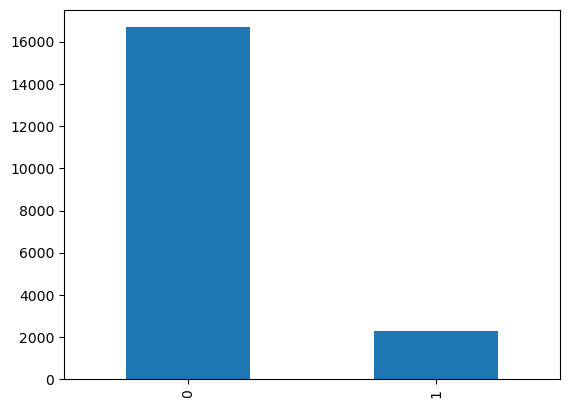

In [7]:
print('0 비율',hotel['is_canceled'].value_counts()[0]/len(hotel) * 100)
print('1 비율',hotel['is_canceled'].value_counts()[1]/len(hotel) * 100)

hotel['is_canceled'].value_counts().plot(kind='bar')

#### (5) 오버 샘플링 기법을 설명하고 비교한 뒤 2개 기법을 선정하고 근거를 제시하시오.

1. Random Over Sampling : 랜덤하게 선택하여 단순 복제
2. SOMTE : KNN을 사용하여 가장 근접한 K개의 클래스를 찾고 그 클래스와 유사한 데이터를 생성하는 방식

#### (6) 기법을 선정한 이유를 작성하고, 원데이터를 포함해 3개의 데이터 세트를 구성하시오.

1. 쉽게 적용할 수 있음
2. 오버 샘플링 문제를 해결할 수 있음

In [8]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler

target = 'is_canceled'
features = hotel.columns.tolist()
features.remove(target)

x, y = hotel[features], hotel[target]

random_sample = RandomOverSampler(random_state=42)
x_rs, y_rs = random_sample.fit_resample(hotel[features], hotel[target])

smote_sample = SMOTE(random_state=42)
x_sm, y_sm = smote_sample.fit_resample(hotel[features], hotel[target])
y_rs.value_counts(), y_sm.value_counts()

(0    16675
 1    16675
 Name: is_canceled, dtype: int64,
 0    16675
 1    16675
 Name: is_canceled, dtype: int64)

#### (7) 오버 샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고, 그 이유를 설명하시오.

일반적으로 성능이 좋은 부스팅 계열의 xgboost를 성능 측면 모델로 사용
이진 분류이기 때문에 가장 간단한 이진분류 모델인 logistic regression 모델을 이용하여 속도 측면 모델로 사용

In [10]:
import time
import warnings
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

def evaluate_fn(x, y):
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
    start = time.time()
    xgb = XGBClassifier(random_state = 42)
    xgb.fit(train_x, train_y)
    y_pred = xgb.predict(test_x)
    print('xgboost accuracy :', accuracy_score(test_y, y_pred))
    end = time.time()
    print('xgboost time :', end - start)

    start = time.time()
    lr = LogisticRegression(random_state=42)
    lr.fit(train_x, train_y)
    y_pred = lr.predict(test_x)
    print('logistic accuracy :', accuracy_score(test_y, y_pred))
    end = time.time()
    print('logistic time :', end - start)

print('=== raw data ===')
evaluate_fn(x, y)
print('=== random sampling data ===')
evaluate_fn(x_rs, y_rs)
print('=== SMOTE data ===')
evaluate_fn(x_sm, y_sm)

=== raw data ===
xgboost accuracy : 0.9300975995779478
xgboost time : 0.4930250644683838
logistic accuracy : 0.9264046425745186
logistic time : 0.09828400611877441
=== random sampling data ===
xgboost accuracy : 0.8569715142428785
xgboost time : 0.8240146636962891
logistic accuracy : 0.7013493253373313
logistic time : 0.16033101081848145
=== SMOTE data ===
xgboost accuracy : 0.8466266866566716
xgboost time : 0.9178860187530518
logistic accuracy : 0.6949025487256372
logistic time : 0.15294885635375977


#### (8) 원데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로 오버 샘플링이 성능에 미친 영향에 대해 작성하시오.

분류 결과 오히려 성능이 떨어졌음 다음과 같은 이유로 떨어졌다고 생각함
1. 데이터의 품질을 올리지 못하여 오히려 데이터 증강 성능이 떨어짐. 이상치 데이터가 많이 존재하므로 해당 데이터를 증강할 경우 오히려 noise가 상승하였을 것
2. SMOTE는 KNN을 기반으로 동작하기 때문에 이상치에 민감하므로 이상치로 인한 성능 하락을 가져왔을 것

이러한 이유로 전처리가 잘못되었을 것으로 생각할 수 있음

1시간 30 분 걸림

### 2. 통계분석 (50점)

#### 1. 공장에서는 시제품의 농도(%)가 60이라고 주장하며 품질관리팀에서 10개의 샘플을 뽑았다. 유의수준 5%에서 다음을 검정하시오.

In [9]:
x =[52 ,50 ,62 ,75 ,26 ,45 ,62 ,35 ,57 ,14 ]


#### (1) 연구가설, 귀무가설을 작성하시오.

H0(귀무가설) : 시제품의 농도가 60이다.

H1(연구가설) : 시제품의 농도가 60이 아니다.

중심극한정리를 사용하기에는 표본의 수가 충분하지 않으므로 일표본 비모수 검정 중에서 부호검정을 실시

#### (2) 유효한 샘플의 수를 계산하시오.

부호검정은  모집단의 중앙값에 대한 검정으로 관찰된 표본 중에서 중앙값을 초과하는 값이 몇 개인지를 파악 하며, 모평균과 모중앙 값은 분포의 위치를 나타내는 모수로써 분포의 형태가 대칭이면 두 모수는 일치한다. 이 과정에서 중앙값보다 높거나 낮은 값들에 대해서만 가설 검정을 진행하므로 중앙값에 해당하는 값들은 샘플로써 사용할 수 없다. 따라서 값이 60인 값은 사용할 수 없으므로 사용 가능한 샘플은 총 10개이다.

In [10]:
len(x) - x.count(60)

10

#### (3) 검정통계량을 구하고 연구가설 채택 여부를 작성하시오.

In [11]:
from scipy.stats import wilcoxon

static, p_value = wilcoxon([value - 60 for value in x])
print(f'검정통계량은 {static}이다.')
print('p-value 값 :', p_value)
if p_value <= 0.05:
    print('귀무가설 기각, 연구가설 채택')
else:
    print('귀무가설 채택')

검정통계량은 9.5이다.
p-value 값 : 0.064453125
귀무가설 채택


1:03 걸림

#### 2. 코로나 시계열 데이터로 다음을 수행하시오.

In [29]:
import pandas as pd
import requests
from io import StringIO

url2 = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/서울특별시 코로나19.csv'
response2 = requests.get(url2)
covid = pd.read_csv(StringIO(response2.text))
covid

,날짜,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,2022-03-30,37261,33753,55376,81018,96008,95433,103288,116862,75118,...,148359,109973,63687,110293,106238,132305,104368,136200,176765,121926
1,2022-03-29,36216,32835,53872,79030,93474,92993,100255,113609,72934,...,143573,106162,61840,106171,102955,127626,100529,132333,172292,118842
2,2022-03-28,35276,31878,52391,76802,91030,90277,97419,110583,70754,...,139633,103573,59946,104109,100665,124805,98869,128813,167386,115846
3,2022-03-27,34879,31577,51652,76108,89876,89302,96359,109500,70003,...,137908,102610,59393,102916,99426,123374,96873,126296,165373,113549
4,2022-03-26,34061,30903,50720,74178,87770,87345,93690,106437,68329,...,134285,99938,57925,100349,96989,120413,95124,123992,161650,110649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2020-02-09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
781,2020-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
782,2020-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,2020-02-06,3,0,0,0,0,0,1,2,0,...,1,0,0,0,0,0,0,0,1,0


#### (1) ACF를 사용해서 distance를 계산하시오

In [30]:
covid['날짜'] = pd.DatetimeIndex(covid['날짜'])
covid = covid.set_index('날짜')
covid.head()

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
날짜,,,,,,,,,,,,,,,,,,,,,
2022-03-30,37261,33753,55376,81018,96008,95433,103288,116862,75118,82254,...,148359,109973,63687,110293,106238,132305,104368,136200,176765,121926
2022-03-29,36216,32835,53872,79030,93474,92993,100255,113609,72934,79677,...,143573,106162,61840,106171,102955,127626,100529,132333,172292,118842
2022-03-28,35276,31878,52391,76802,91030,90277,97419,110583,70754,77878,...,139633,103573,59946,104109,100665,124805,98869,128813,167386,115846
2022-03-27,34879,31577,51652,76108,89876,89302,96359,109500,70003,76542,...,137908,102610,59393,102916,99426,123374,96873,126296,165373,113549
2022-03-26,34061,30903,50720,74178,87770,87345,93690,106437,68329,75119,...,134285,99938,57925,100349,96989,120413,95124,123992,161650,110649


In [32]:
import statsmodels.api as sm

n_lags = len(covid)

acf_dict = {}
for column in covid.columns:
    acf_list = sm.tsa.stattools.acf(covid[column], nlags=n_lags)
    acf_dict[column] = acf_list

acf_df = pd.DataFrame(acf_dict)
acf_df

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.965624,0.966025,0.965807,0.964843,0.965118,0.966179,0.964429,0.964386,0.964873,0.964677,...,0.963102,0.964896,0.964495,0.964211,0.964682,0.964599,0.964920,0.965594,0.965216,0.964788
2,0.932172,0.932933,0.932148,0.930035,0.930705,0.932781,0.929547,0.929349,0.930425,0.930168,...,0.927079,0.930870,0.929726,0.929708,0.930160,0.930349,0.931073,0.931913,0.930854,0.930000
3,0.899077,0.900435,0.899075,0.895739,0.896734,0.900063,0.895251,0.894822,0.896665,0.895849,...,0.891603,0.897198,0.895662,0.895164,0.895834,0.896316,0.897017,0.898790,0.897147,0.895648
4,0.865542,0.867391,0.865682,0.860691,0.862274,0.866781,0.860302,0.859554,0.862291,0.861332,...,0.855502,0.862796,0.860914,0.860051,0.860964,0.861660,0.863028,0.865697,0.862857,0.861294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,-0.017175,-0.017212,-0.017232,-0.015171,-0.015231,-0.016054,-0.016019,-0.015739,-0.015857,-0.015638,...,-0.015340,-0.016170,-0.015477,-0.016447,-0.016157,-0.016273,-0.016151,-0.016955,-0.015392,-0.015228
781,-0.013889,-0.013915,-0.013929,-0.012270,-0.012320,-0.012982,-0.012970,-0.012738,-0.012831,-0.012644,...,-0.012420,-0.013083,-0.012523,-0.013303,-0.013069,-0.013163,-0.013059,-0.013717,-0.012449,-0.012334
782,-0.010519,-0.010542,-0.010562,-0.009290,-0.009335,-0.009836,-0.009829,-0.009646,-0.009726,-0.009589,...,-0.009417,-0.009909,-0.009490,-0.010075,-0.009899,-0.009972,-0.009907,-0.010415,-0.009434,-0.009360
783,-0.007108,-0.007135,-0.007144,-0.006282,-0.006309,-0.006655,-0.006652,-0.006522,-0.006586,-0.006479,...,-0.006374,-0.006704,-0.006427,-0.006808,-0.006687,-0.006742,-0.006686,-0.007044,-0.006380,-0.006323


#### (2) 계층적 군집 분석을 위해 덴드로그램을 작성하시오.

In [33]:
class font_setting():
    def __init__(self):
        self.font_url = "https://github.com/google/fonts/blob/main/ofl/nanumgothic/NanumGothic-Regular.ttf?raw=true"
        self.path = "./NanumGothic-Regular.ttf"
        
    def get_font(self):
        import requests
        from matplotlib import font_manager, rc
        import matplotlib.pyplot as plt
        
        res = requests.get(self.font_url)
        
        with open(self.path, "wb") as font_file:
            font_file.write(res.content)
        
        font_manager.fontManager.ttflist += font_manager.createFontList([self.path])
        rc('font', family='NanumGothic')
        plt.rcParams["font.family"] = 'NanumGothic'
    
    def delete_font(self):
        import os
        os.remove(self.path)

font_set = font_setting()
font_set.get_font()

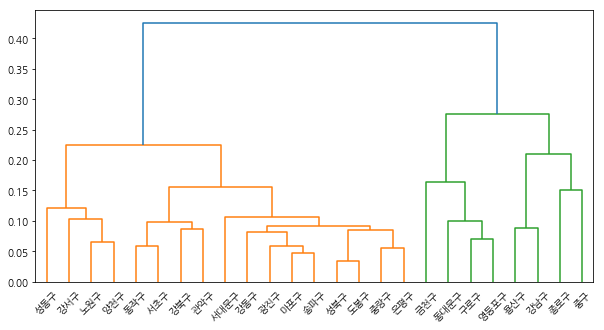

In [40]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

acf_df_t = acf_df.T
dend = linkage(acf_df_t, method='average', metric='euclidean')

plt.figure(figsize=(10, 5))
dendrogram(dend, labels=acf_df_t.index)
plt.show()

In [41]:
font_set.delete_font()

#### 3. 사회과학, 자연과학, 공학 세 개 학과의 평점조사표를 보고 학과와 성적이 관계있는지 검정하시오.

In [3]:
import pandas as pd

사회 = [16, 30, 12]
자연 = [12, 20, 3]
공학 = [18, 13, 14]
table = pd.DataFrame({'사회과학': 사회,
                     '자연과학': 자연,
                     '공학': 공학},
                     index=['3.5~4.5', '2.5~3.5', '1.5~2.5'])
print (table)

         사회과학  자연과학  공학
3.5~4.5    16    12  18
2.5~3.5    30    20  13
1.5~2.5    12     3  14


#### (1) 연구가설, 귀무가설을 작성하시오.

H0 : 학과와 성적은 관련이 있다(독립).

H1 : 학과와 성적은 관련이 없다(독립 X).

#### (2) 학과와 성적이 독립일 때 기댓값을 구하시오.

In [5]:
from scipy.stats import chi2_contingency
chi2 , p_value ,dof, expected = chi2_contingency(table)
print(expected)

[[19.33333333 11.66666667 15.        ]
 [26.47826087 15.97826087 20.54347826]
 [12.1884058   7.35507246  9.45652174]]


#### (3) 검정통계량을 구하고 연구가설 채택 여부를 작성하시오.

In [7]:
print('검정통계량', chi2)
print('p-value', p_value)

if p_value <= 0.05:
    print('귀무가설 기각, 연구가설 채택')
else:
    print('귀무가설 채택')

검정통계량 10.199441509990177
p-value 0.03719883770303157
귀무가설 기각, 연구가설 채택
